<a href="https://colab.research.google.com/github/ArtunKARA/MusicEmotionRecognition/blob/main/CNN_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gerekli Kütüphanelerin Kurulumu

In [ ]:
# Install required libraries
!pip install librosa matplotlib scikit-learn tensorflow

import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc, confusion_matrix, matthews_corrcoef


Verilerin Hazırlanması

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

agresif_muzikler = '/content/drive/My Drive/Music Data/Agresif'
huzunlu_muzikler = '/content/drive/My Drive/Music Data/Hüzünlü'
neseli_muzikler = '/content/drive/My Drive/Music Data/Neşeli'

# Ses dosyalarını ve etiketlerini yükleyin
def load_data(klasor_yolu, label):
    X = []
    y = []
    for dosya in os.listdir(klasor_yolu):
        dosya_yolu = os.path.join(klasor_yolu, dosya)
        data, sample_rate = librosa.load(dosya_yolu)
        mels = librosa.feature.melspectrogram(y=data, sr=sample_rate)
        X.append(mels.T)  # .T ile transpose ederek (time, features) şekline getiriyoruz
        y.append(label)
    return X, y

# Verilerin yüklenmesi
X_agresif, y_agresif = load_data(agresif_muzikler, 'Agresif')
X_huzunlu, y_huzunlu = load_data(huzunlu_muzikler, 'Hüzünlü')
X_neseli, y_neseli = load_data(neseli_muzikler, 'Neşeli')

# Verileri birleştirin
X = X_agresif + X_huzunlu + X_neseli
y = y_agresif + y_huzunlu + y_neseli

# Etiketleri sayısal değerlere dönüştürün
le = LabelEncoder()
y = le.fit_transform(y)

# Pad sequences to have the same length
X_padded = pad_sequences(X, padding='post', dtype='float32')

# NumPy array'e dönüştürün
X_padded = np.array(X_padded)
y = np.array(y)

# Eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

Mounted at /content/drive


 Modelin Tanımlanması

In [ ]:
# CNN-20 modelinin oluşturulması
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=(128, 87, 1)))

    model.add(MaxPooling2D(pool_size=2))

    model.add(Dropout(rate = 0.8))

    model.add(Flatten())

    model.add(Dense(50, activation='relu'))

    model.add(Dropout(rate = 0.8))
    model.add(Dense(len(np.unique(y)), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


 Cross-Validation ile Eğitim ve Değerlendirme

Epoch 1/20
148/148 - 44s - loss: 33.9857 - accuracy: 0.3896 - val_loss: 1.0926 - val_accuracy: 0.3875 - 44s/epoch - 301ms/step
Epoch 2/20
148/148 - 19s - loss: 1.0486 - accuracy: 0.4576 - val_loss: 1.1078 - val_accuracy: 0.3663 - 19s/epoch - 128ms/step
Epoch 3/20
148/148 - 19s - loss: 1.0079 - accuracy: 0.4967 - val_loss: 1.0494 - val_accuracy: 0.4408 - 19s/epoch - 129ms/step
Epoch 4/20
148/148 - 19s - loss: 0.9803 - accuracy: 0.5291 - val_loss: 0.9501 - val_accuracy: 0.5305 - 19s/epoch - 129ms/step
Epoch 5/20
148/148 - 19s - loss: 0.9246 - accuracy: 0.5949 - val_loss: 0.8137 - val_accuracy: 0.6591 - 19s/epoch - 129ms/step
Epoch 6/20
148/148 - 19s - loss: 0.7651 - accuracy: 0.6893 - val_loss: 0.7495 - val_accuracy: 0.6954 - 19s/epoch - 129ms/step
Epoch 7/20
148/148 - 19s - loss: 0.7006 - accuracy: 0.7249 - val_loss: 0.6930 - val_accuracy: 0.7242 - 19s/epoch - 128ms/step
Epoch 8/20
148/148 - 19s - loss: 0.6294 - accuracy: 0.7534 - val_loss: 0.7135 - val_accuracy: 0.7191 - 19s/epoch - 12

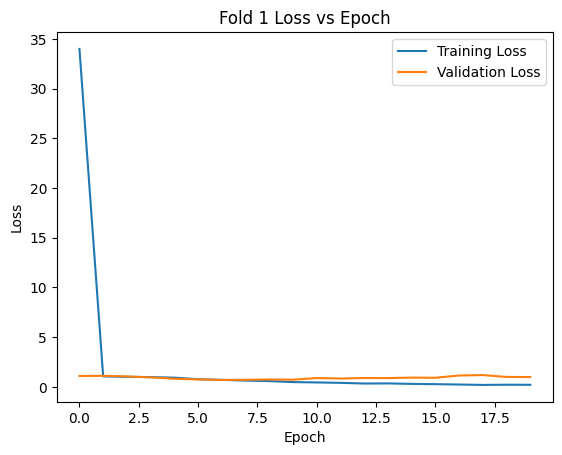

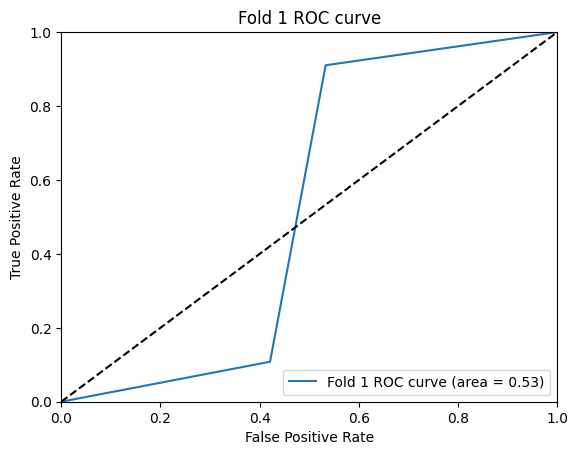

Epoch 1/20
148/148 - 22s - loss: 16.4530 - accuracy: 0.3911 - val_loss: 1.0716 - val_accuracy: 0.4196 - 22s/epoch - 148ms/step
Epoch 2/20
148/148 - 19s - loss: 1.0572 - accuracy: 0.4542 - val_loss: 1.0461 - val_accuracy: 0.4442 - 19s/epoch - 129ms/step
Epoch 3/20
148/148 - 19s - loss: 1.0101 - accuracy: 0.4990 - val_loss: 0.9991 - val_accuracy: 0.4907 - 19s/epoch - 129ms/step
Epoch 4/20
148/148 - 19s - loss: 0.9584 - accuracy: 0.5342 - val_loss: 0.9418 - val_accuracy: 0.5711 - 19s/epoch - 129ms/step
Epoch 5/20
148/148 - 19s - loss: 0.9017 - accuracy: 0.5945 - val_loss: 0.8474 - val_accuracy: 0.6591 - 19s/epoch - 128ms/step
Epoch 6/20
148/148 - 19s - loss: 0.7820 - accuracy: 0.6902 - val_loss: 0.8251 - val_accuracy: 0.6937 - 19s/epoch - 128ms/step
Epoch 7/20
148/148 - 19s - loss: 0.6817 - accuracy: 0.7374 - val_loss: 0.7891 - val_accuracy: 0.6988 - 19s/epoch - 128ms/step
Epoch 8/20
148/148 - 19s - loss: 0.5881 - accuracy: 0.7678 - val_loss: 0.8412 - val_accuracy: 0.6980 - 19s/epoch - 12

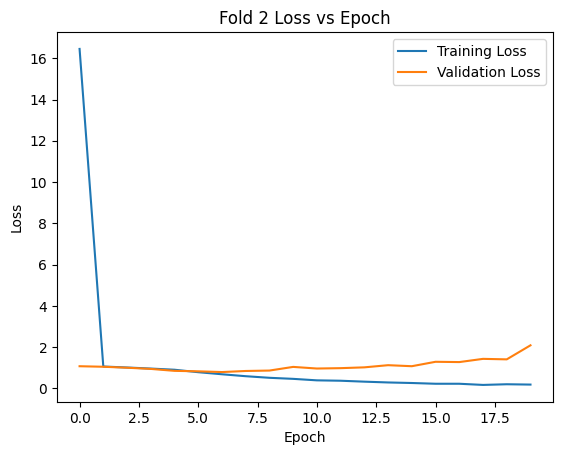

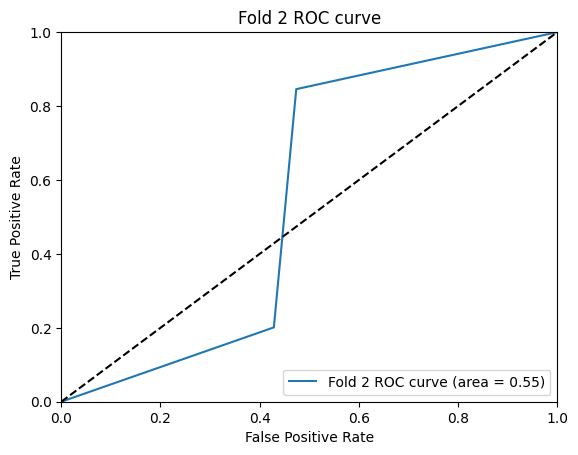

Epoch 1/20
148/148 - 29s - loss: 29.1848 - accuracy: 0.3942 - val_loss: 1.1051 - val_accuracy: 0.3378 - 29s/epoch - 198ms/step
Epoch 2/20
148/148 - 19s - loss: 1.0548 - accuracy: 0.4545 - val_loss: 1.1220 - val_accuracy: 0.3506 - 19s/epoch - 129ms/step
Epoch 3/20
148/148 - 19s - loss: 1.0378 - accuracy: 0.4801 - val_loss: 1.0413 - val_accuracy: 0.4157 - 19s/epoch - 129ms/step
Epoch 4/20
148/148 - 19s - loss: 0.9883 - accuracy: 0.5222 - val_loss: 0.9762 - val_accuracy: 0.5724 - 19s/epoch - 129ms/step
Epoch 5/20
148/148 - 19s - loss: 0.8564 - accuracy: 0.6426 - val_loss: 0.8035 - val_accuracy: 0.6698 - 19s/epoch - 129ms/step
Epoch 6/20
148/148 - 19s - loss: 0.8430 - accuracy: 0.6564 - val_loss: 0.9126 - val_accuracy: 0.5639 - 19s/epoch - 129ms/step
Epoch 7/20
148/148 - 19s - loss: 0.7383 - accuracy: 0.7069 - val_loss: 0.7321 - val_accuracy: 0.6850 - 19s/epoch - 128ms/step
Epoch 8/20
148/148 - 19s - loss: 0.6425 - accuracy: 0.7505 - val_loss: 0.7347 - val_accuracy: 0.7307 - 19s/epoch - 12

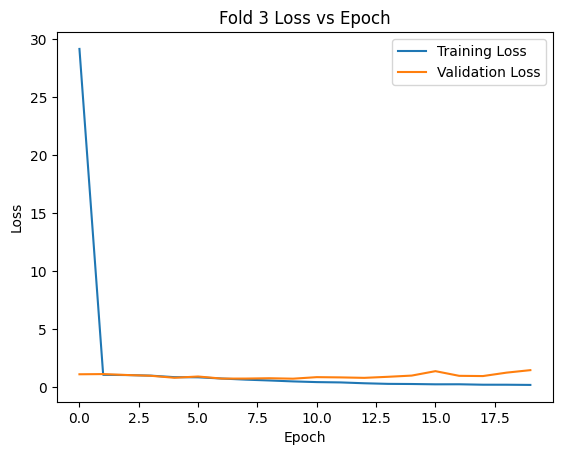

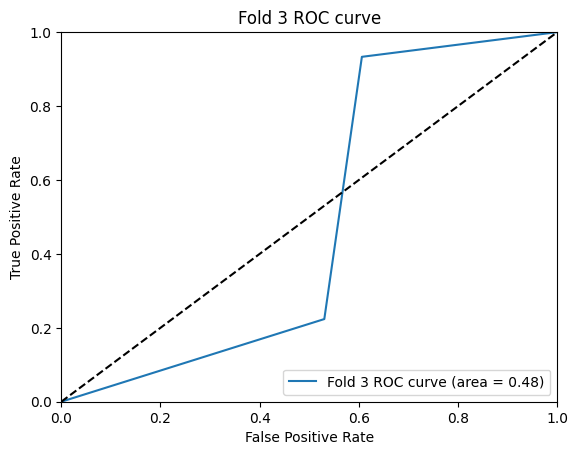

Epoch 1/20
148/148 - 22s - loss: 51.7415 - accuracy: 0.4096 - val_loss: 1.0658 - val_accuracy: 0.4403 - 22s/epoch - 148ms/step
Epoch 2/20
148/148 - 19s - loss: 1.0520 - accuracy: 0.4645 - val_loss: 1.0744 - val_accuracy: 0.4047 - 19s/epoch - 130ms/step
Epoch 3/20
148/148 - 19s - loss: 1.0317 - accuracy: 0.4907 - val_loss: 1.0737 - val_accuracy: 0.4318 - 19s/epoch - 130ms/step
Epoch 4/20
148/148 - 19s - loss: 1.0064 - accuracy: 0.5129 - val_loss: 1.0074 - val_accuracy: 0.4886 - 19s/epoch - 129ms/step
Epoch 5/20
148/148 - 19s - loss: 0.9547 - accuracy: 0.5588 - val_loss: 0.9453 - val_accuracy: 0.5707 - 19s/epoch - 129ms/step
Epoch 6/20
148/148 - 19s - loss: 0.8400 - accuracy: 0.6627 - val_loss: 0.9067 - val_accuracy: 0.5910 - 19s/epoch - 128ms/step
Epoch 7/20
148/148 - 19s - loss: 0.7506 - accuracy: 0.6860 - val_loss: 0.8397 - val_accuracy: 0.6494 - 19s/epoch - 128ms/step
Epoch 8/20
148/148 - 19s - loss: 0.6851 - accuracy: 0.7268 - val_loss: 0.8351 - val_accuracy: 0.6511 - 19s/epoch - 12

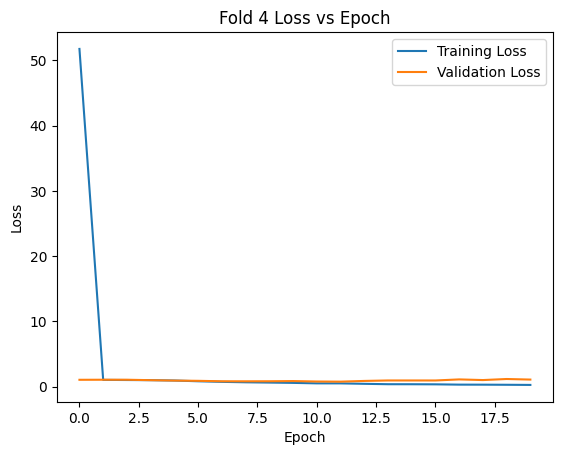

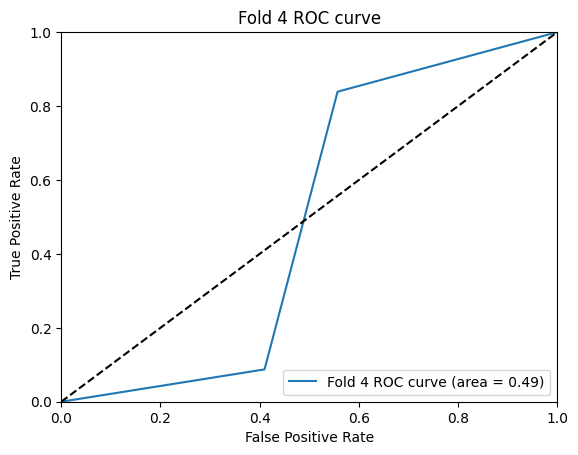

Epoch 1/20


ResourceExhaustedError: Graph execution error:

Detected at node sequential_4/conv2d_12/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-5-7cf93dcee1b6>", line 16, in <cell line: 10>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

OOM when allocating tensor with shape[32,1290,126,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_4/conv2d_12/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_71558]

In [ ]:
# Verilerin şekillendirilmesi
X_padded = X_padded[..., np.newaxis]  # (num_samples, height, width, channels)
input_shape = X_padded[0].shape

# Cross-validation ve model eğitimi
kf = KFold(n_splits=4, shuffle=True, random_state=42)
fold = 1
evaluation_metrics = []

for train_index, test_index in kf.split(X_padded):
    X_train_fold, X_test_fold = X_padded[train_index], X_padded[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    model = create_cnn_model(input_shape)

    history = model.fit(X_train_fold, y_train_fold, epochs=20, validation_data=(X_test_fold, y_test_fold), verbose=2)

    y_pred = model.predict(X_test_fold)
    y_pred_classes = np.argmax(y_pred, axis=1)

    acc = accuracy_score(y_test_fold, y_pred_classes)
    f1 = f1_score(y_test_fold, y_pred_classes, average='macro')
    recall = recall_score(y_test_fold, y_pred_classes, average='macro')
    precision = precision_score(y_test_fold, y_pred_classes, average='macro')
    mcc = matthews_corrcoef(y_test_fold, y_pred_classes)

    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_classes, pos_label=1)
    roc_auc = auc(fpr, tpr)

    evaluation_metrics.append([acc, f1, recall, precision, mcc, roc_auc])

    # Loss vs Epoch grafiği
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # ROC curve grafiği
    plt.figure()
    plt.plot(fpr, tpr, label=f'Fold {fold} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title(f'Fold {fold} ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    fold += 1

# Ortalama metriklerin raporlanması
evaluation_metrics = np.array(evaluation_metrics)
mean_metrics = evaluation_metrics.mean(axis=0)
std_metrics = evaluation_metrics.std(axis=0)
metrics_names = ['Accuracy', 'F-measure', 'Recall', 'Precision', 'MCC', 'AUC']

print("Mean Evaluation Metrics:")
for name, mean, std in zip(metrics_names, mean_metrics, std_metrics):
    print(f"{name}: {mean:.4f} ± {std:.4f}")
